<a href="https://colab.research.google.com/github/yooste/SOLUX_summer_data/blob/master/4%EC%A3%BC%EC%B0%A8/bike_sharing_demand_0815.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

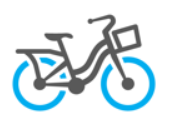




Data Fields from [Bike Sharing Demand|Kaggle](https://www.kaggle.com/c/bike-sharing-demand/overview)


**Description**

  - datatime - hourly date + timestamp
  - season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
  - holiday - whether the day is considered a holidaty
  - workingday - whether the day is neither a weekend nor holiday
  - weather
      - 1: Clear, Few clouds, Partly cloudy
      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
  - temp - temperature in Celsius
  - atemp - "feels like" temperature in Celsius
  - humidity - relative humidity
  - windspeed - wind speed
  - casual - number of non-registered user rentals initiated
  - registered - number of registered user rentals initiated
  - count - number of total rentals


**Evaluation**

Submissions are evaluated one the Root Mean Squared Logarithmic Error(RMSLE).

분류와 회귀 중 회귀와 관련된 문제 => 자전거 대여량을 예측하는 문제이기 때문에

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas.util.testing as tm
import matplotlib.font_manager as fm
# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus']=False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv('data/train.csv', parse_dates=['datetime']) # datetime 형식으로 불러온다.
train.shape

(10886, 12)

In [4]:
# train.columns
# train.dtypeds
train.info()  # train에 대한 자세한 정보를 살펴 봄

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
train.head()  # 상위 5개 데이터 불러오기

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.temp.describe() # 기온에 대해 자세히 보기
# 데이터 수: 10886개, 평균: 20.23도

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [7]:
train.isnull().sum()  # train 데이터 중 null인 데이터가 있는지 확인
# 없음

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

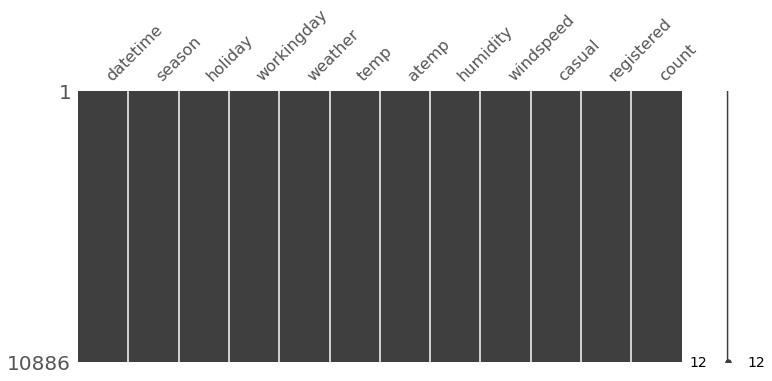

In [8]:
import missingno as msno

# null인 데이터가 있는지 시각화 - 없음
msno.matrix(train, figsize = (12,5))

In [9]:
# 시각화하여 보기 편하게 연/월/일/시/분/초로 나누어서 데이터프레임에 다시 담음
# column이 12개에서 18개로 늘어남
train['year']=train['datetime'].dt.year
train['month']=train['datetime'].dt.month
train['day']=train['datetime'].dt.day
train['hour']=train['datetime'].dt.hour
train['minute']=train['datetime'].dt.minute
train['second']=train['datetime'].dt.second
train.shape

(10886, 18)

In [10]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

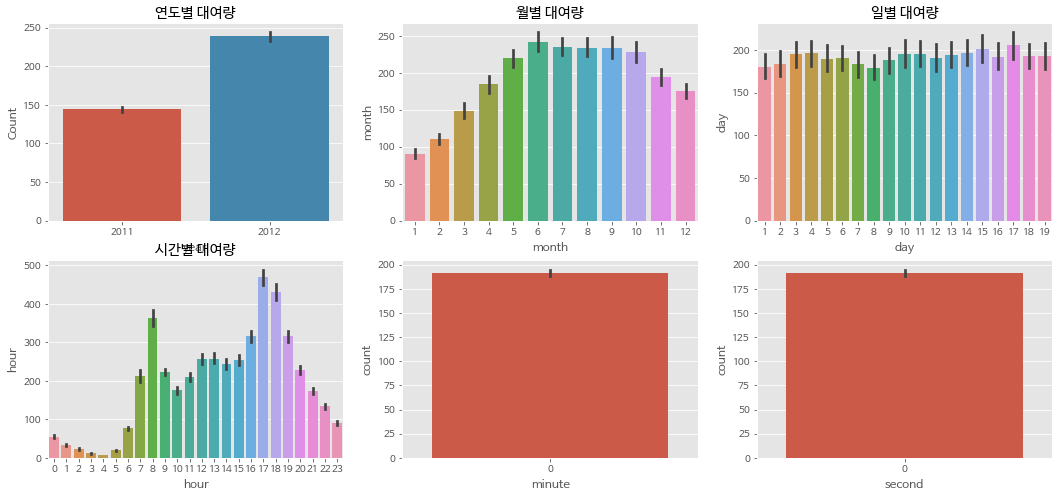

In [12]:
# 한글폰트를 사용하기 위함
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name() # 서체의 이름을 가져옴
plt.rc('font', family=font_name)

# 행이 2개, 열이 3개인 그래프를 그려주기
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

# alias를 지정해주는 방법 사용
# x축에는 시간값을 넣고 y축에는 count값을 넣음
sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

ax1.set(ylabel='Count', title='연도별 대여량')
ax2.set(ylabel='month', title='월별 대여량')
ax3.set(ylabel='day', title='일별 대여량')
ax4.set(ylabel='hour', title='시간별 대여량')

  - 연도별 대여량은 2011년 보다 2012년이 더 많다.
  - 월별 대여량은 6월에 가장 많고 7~10월도 대여량이 많다. 그리고 1월에 가장 적다.
  - 일별 대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터는 피처로 사용하면 안 된다.
  - 시간 대 대여량을 보면 출퇴근 시간에 대여량이 많은 것 같다. 하지만 주말과 나누어 볼 필요가 있을 것 같다.
  - 분, 초도 다 0이기 때문에 의미가 없다.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

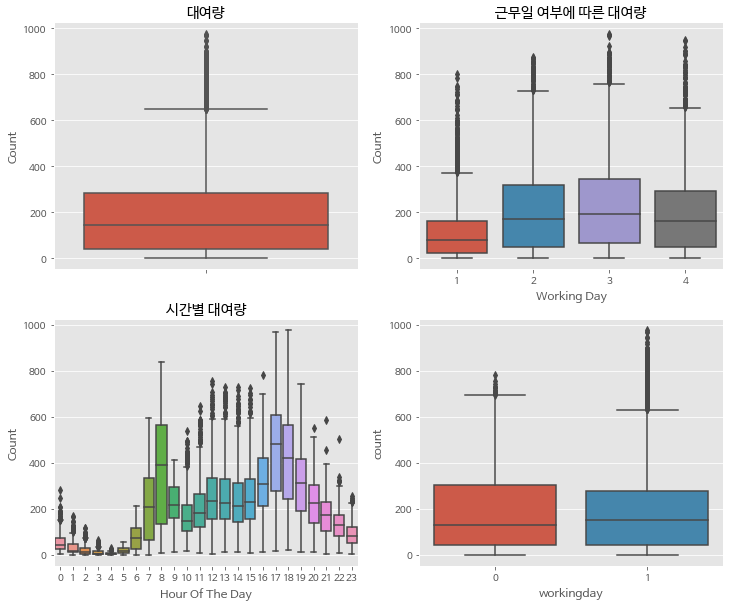

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(12,10)
# 계절/시간/근무일 기준으로 boxplot을 그림
sns.boxplot(data=train, y='count', orient='v', ax=axes[0][0])
# 특정 구간에 몰려있는 것으로 보임
sns.boxplot(data=train, y='count', x='season', orient='v', ax=axes[0][1])
# 봄이 가장 적고 여름과 가을에 많고 겨울이 그 다음으로 보여짐
sns.boxplot(data=train, y='count', x='hour', orient='v', ax=axes[1][0])
# 시간에 대해서는 위에서 그린 그래프와 거의 유사
sns.boxplot(data=train, y='count', x='workingday', orient='v', ax=axes[1][1])
# 근무일에 대해서는 큰 차이가 없음. 단, 휴일에 대여량이 조금 더 많다.

axes[0][0].set(ylabel='Count', title='대여량')
axes[0][1].set(xlabel='Season', ylabel='Count', title='계절별 대여량')
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count', title='시간별 대여량')
axes[0][1].set(xlabel='Working Day', ylabel='Count', title='근무일 여부에 따른 대여량')

In [15]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [16]:
train['dayofweek'].value_counts()
# 0~6은 월~일을 뜻함

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

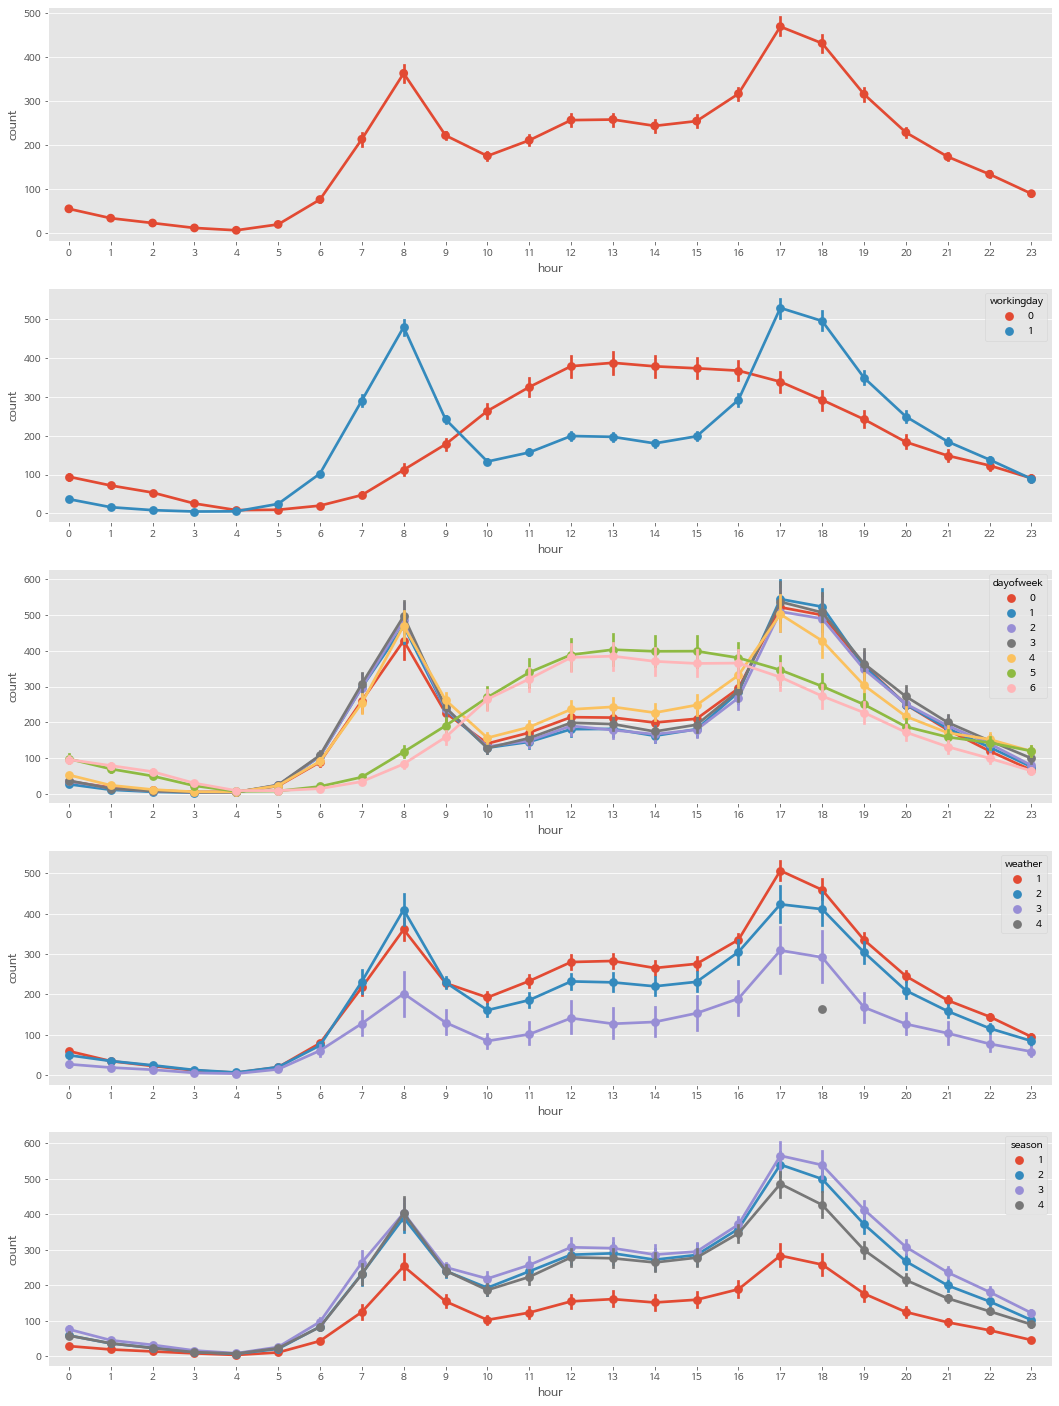

In [17]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)  # 5개의 그래프를 그림
fig.set_size_inches(18,25)

# 시간대별 대여량을 pointplot으로 나타냄
sns.pointplot(data=train, x='hour', y='count', ax=ax1)
sns.pointplot(data=train, x='hour', y='count', hue='workingday', ax=ax2)
sns.pointplot(data=train, x='hour', y='count', hue='dayofweek', ax=ax3)
sns.pointplot(data=train, x='hour', y='count', hue='weather', ax=ax4)
sns.pointplot(data=train, x='hour', y='count', hue='season', ax=ax5)

In [20]:
# 다음 항목들에 대해 어떤 연관관계가 있는지 살펴봄
corrMatt = train[['temp', 'atemp', 'casual','registered','humidity','windspeed','count']]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


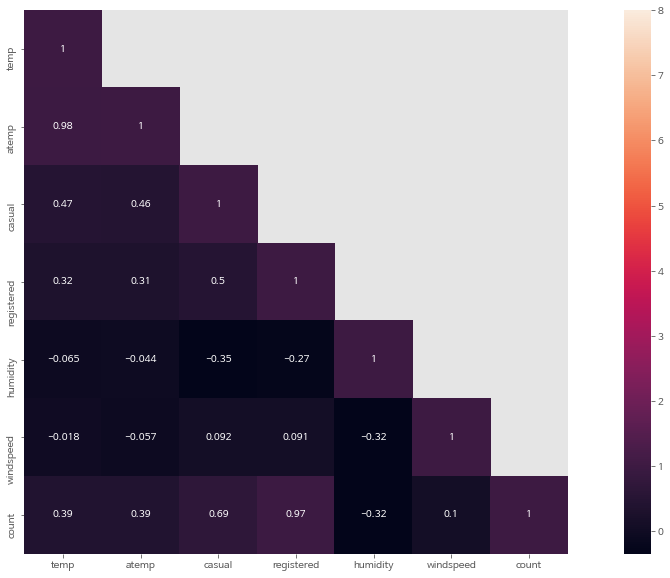

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
# 온도, 체감온도, 등록여부, 습도, 풍속, 대여량 등에 대한 관계를 heatmap으로 표현
sns.heatmap(corrMatt, mask=mask, vmax=8, square=True, annot=True)

  - 온도, 습도, 풍속은 거의 연관관계가 없다.
  - 대여량과 가장 연관이 높은 건 registered로 등록된 대여자가 많지만, test 데이터에는 이 값이 없다.
  - atemp와 temp는 0.98로 상관관계가 높지만 온도와 체감온도를 피처로 사용하기에 적합하지 않을 수 있다.

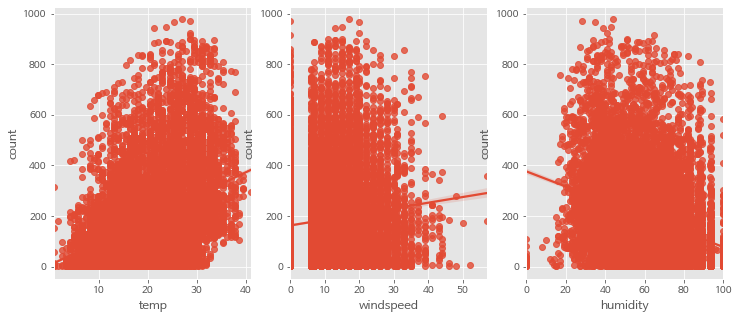

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12,5)

# 온도, 풍속, 습도에 대해 산점도(regplot)을 그려봄
sns.regplot(x='temp', y='count', data=train, ax=ax1)
sns.regplot(x='windspeed', y='count', data=train, ax=ax2)
sns.regplot(x='humidity', y='count', data=train, ax=ax3)

  - 풍속의 경우 0에 숫자가 몰려 있는 것으로 보인다. 아마도 관측되지 않은 수치에 대해 0으로 기록된 것이 아닐까 추측해본다.

In [23]:
# 연도와 월을 붙여주는 함수 정의
def concatenate_year_month(datetime):
  return "{0}-{1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


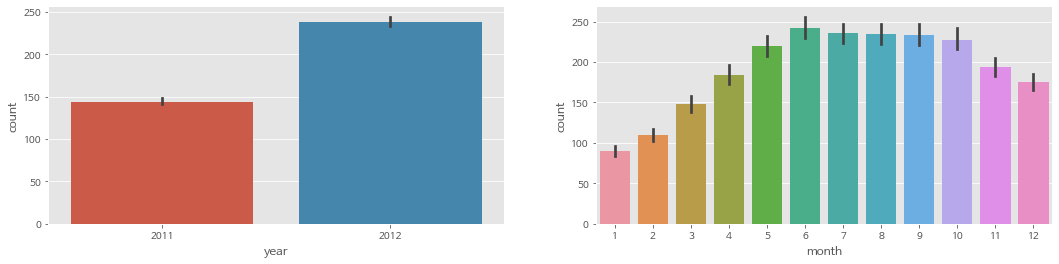

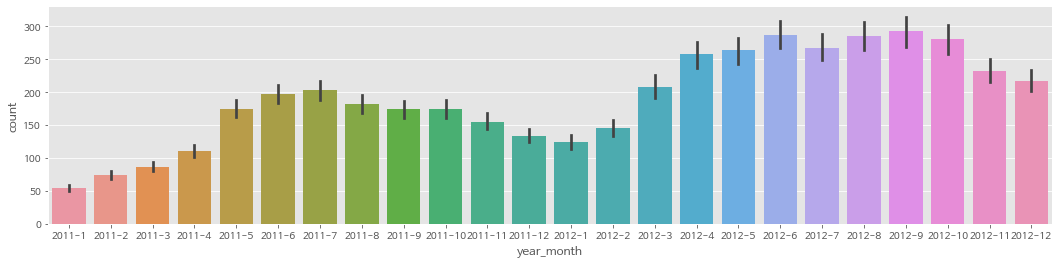

In [24]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year', y='count', ax=ax1)  # 연도별 : 2011<2012
sns.barplot(data=train, x='month', y='count', ax=ax2) # 월별 : 날씨가 따뜻할 때 많이 빌리는 추세

fig, ax3 = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(18,4)

sns.barplot(data=train, x='year_month', y='count', ax=ax3)  # 2011~2012 전체적으로 봤을 때 계속 늘어나는 추세

  - 2011년보다 2012년의 대여량이 더 많다.
  - 겨울보다는 여름에 대여량이 많다.
  - 2011년과 2012년의 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.

In [25]:
# trainWithoutOutliers
# outlier 데이터들을 제거하고 보기
# 0에 몰려있는 데이터와 끝에 있는 데이터를 제거 하고 보기
trainWithoutOutliers = train[np.abs(train['count']-train['count'].mean()) <= (3*train['count'].std())]

print(train.shape)
print(trainWithoutOutliers.shape)   # 150개 정도 줄여짐

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909617))

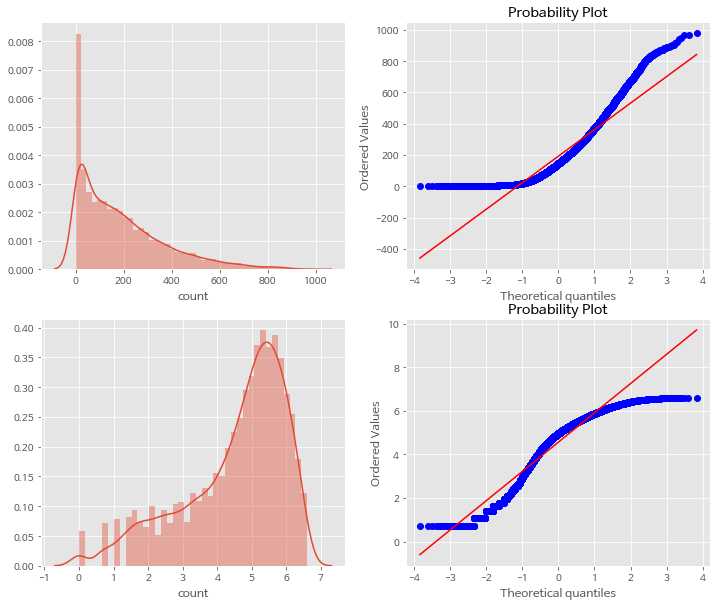

In [29]:
# count값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(12,10)

# outlier들을 제거하지 않은 데이터와 제거한 데이터를 distplot과 probplot으로 그려봄
sns.distplot(train['count'], ax=axes[0][0])
stats.probplot(train['count'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(trainWithoutOutliers['count']), ax=axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']), dist='norm', fit=True, plot=axes[1][1])

count변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal 이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 'count'변수에 로그를 씌워 변경해봐도 정규분포를 따르지는 않지만 이전 그래프보다는 좀 더 자세히 표현하고 있다.